# README
- RM から MEDV を予測する
- 単回帰における仮定に着目する

In [1]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

warnings.filterwarnings('ignore')

%matplotlib inline

## データの準備

In [2]:
from sklearn.datasets import load_boston

boston = load_boston()

In [3]:
# skleranの変数名の方式に合わせておく(X: 説明変数 y: 目的変数)
X = boston.data[:, 5:6] # RMだけ使用する
y = boston.target

In [4]:
# データ分析しやすくするためにDFに変換
df = pd.DataFrame(X, columns=['RM'])
df['MEDV'] = y

df.head()

RM  MEDV
0  6.575  24.0
1  6.421  21.6
2  7.185  34.7
3  6.998  33.4
4  7.147  36.2

## RM と MEDV の関係性を観察する

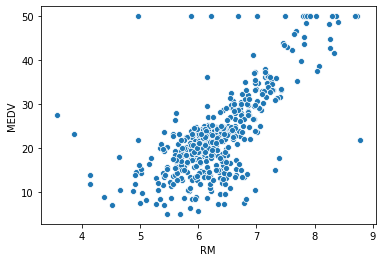

In [5]:
sns.scatterplot(df['RM'], df['MEDV'])

# sns.scatterplot('RM', 'MEDV', data=df) # こっちでもOK

## 予測モデルの構築

In [6]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()

# 学習(=未知のパラメータの最適化)
linear_regression.fit(df[['RM']], y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## 結果の確認

In [7]:
w0 = linear_regression.intercept_
w1 = linear_regression.coef_[0]

print(f'MEDV = {w0:.2f} RM + {w1:.2f}')

MEDV = -34.67 RM + 9.10


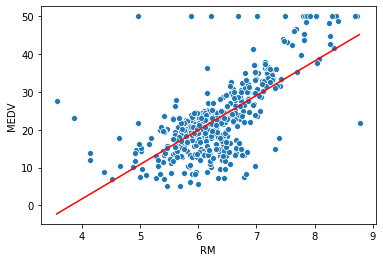

In [8]:
# もとの散布図に予測の直線を描画する
sns.scatterplot(df['RM'], df['MEDV'])

# RMの最小値 から RMの最大値 を 0.01 刻みにしたデータを生成
x_line = np.arange(df['RM'].min(), 
                   df['RM'].max(), 
                   step=0.01)

# 予測値の計算( .predict(X) で予測できる)
y_pred = linear_regression.predict(x_line.reshape(-1, 1))

# 直線を描画
plt.plot(x_line, y_pred, c='r')

In [9]:
r2_score = linear_regression.score(X, y)
print(f'{r2_score:.3f}')

0.484


果たして正しい予測ができているといえるのだろうか？